In [2]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Step 2: Load Dataset
df = pd.read_csv("churn-bigml-20.csv")

print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (667, 20)


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [6]:
# 📌 Step 3: Data Preprocessing

# Make a copy
data = df.copy()

# Encode categorical variables
label_enc = LabelEncoder()
data['State'] = label_enc.fit_transform(data['State'])
data['International plan'] = data['International plan'].map({'Yes': 1, 'No': 0})
data['Voice mail plan'] = data['Voice mail plan'].map({'Yes': 1, 'No': 0})
data['Churn'] = data['Churn'].astype(int)   # Target

# Features and target
X = data.drop("Churn", axis=1)
y = data["Churn"]

print("Features shape:", X.shape)
print("Target distribution:\n", y.value_counts())


Features shape: (667, 19)
Target distribution:
 Churn
0    572
1     95
Name: count, dtype: int64


In [8]:
# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set:", X_train.shape, "Testing set:", X_test.shape)


Training set: (533, 19) Testing set: (134, 19)


In [10]:
# Step 5: Logistic Regression Model

# Scale data (Logistic Regression needs scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

y_pred_log = log_model.predict(X_test_scaled)
y_prob_log = log_model.predict_proba(X_test_scaled)[:, 1]

print("🔹 Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_log))
print(classification_report(y_test, y_pred_log))

🔹 Logistic Regression Results
Accuracy: 0.8582089552238806
ROC-AUC: 0.8164759725400458
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       115
           1       0.50      0.16      0.24        19

    accuracy                           0.86       134
   macro avg       0.69      0.57      0.58       134
weighted avg       0.82      0.86      0.83       134



In [12]:
# Step 6: Random Forest Model
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

print("🔹 Random Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))
print(classification_report(y_test, y_pred_rf))


🔹 Random Forest Results
Accuracy: 0.9253731343283582
ROC-AUC: 0.9217391304347826
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       115
           1       1.00      0.47      0.64        19

    accuracy                           0.93       134
   macro avg       0.96      0.74      0.80       134
weighted avg       0.93      0.93      0.91       134



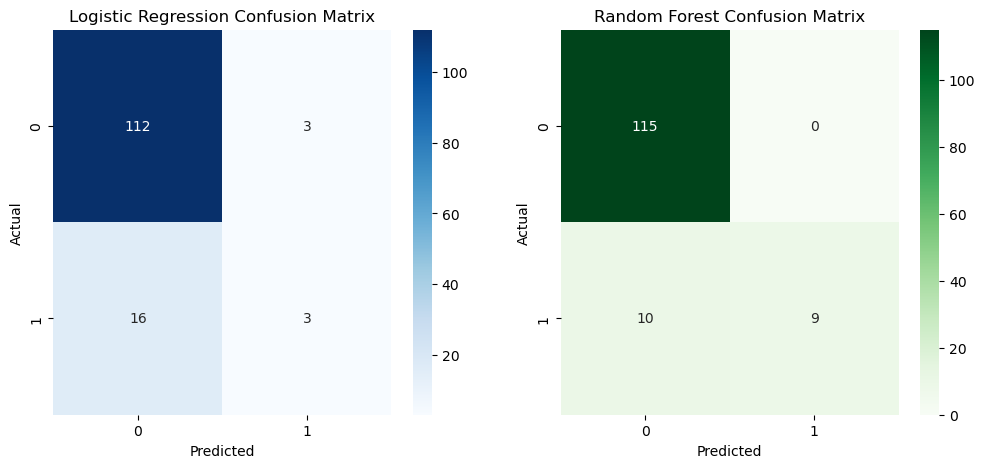

In [14]:
# Step 7: Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Random Forest Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.show()


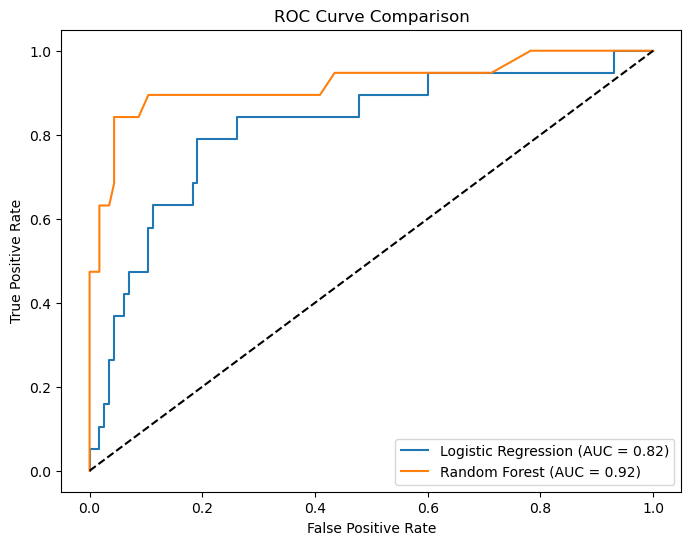

In [16]:
# Step 8: ROC Curve Comparison
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(8,6))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {roc_auc_score(y_test, y_prob_log):.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_score(y_test, y_prob_rf):.2f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


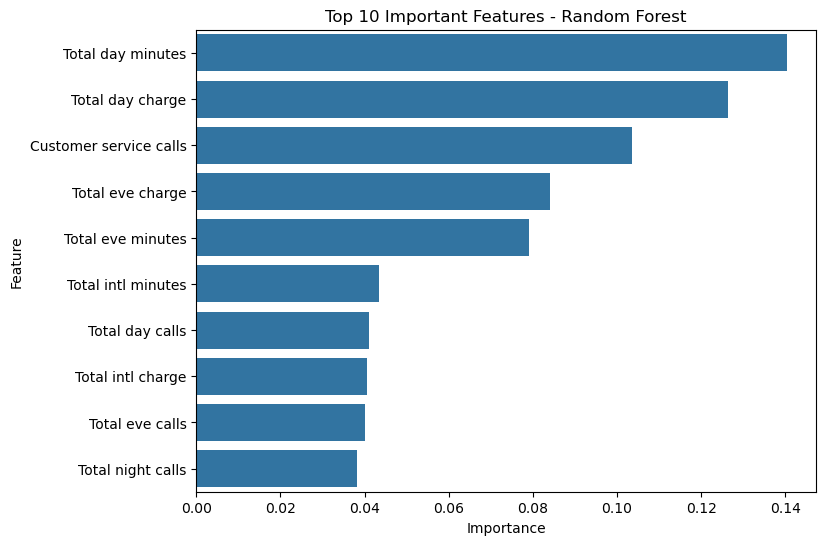

In [18]:
# Step 9: Feature Importance (Random Forest)
importances = rf_model.feature_importances_
features = X.columns
feat_df = pd.DataFrame({"Feature": features, "Importance": importances})
feat_df = feat_df.sort_values(by="Importance", ascending=False).head(10)

plt.figure(figsize=(8,6))
sns.barplot(x="Importance", y="Feature", data=feat_df)
plt.title("Top 10 Important Features - Random Forest")
plt.show()


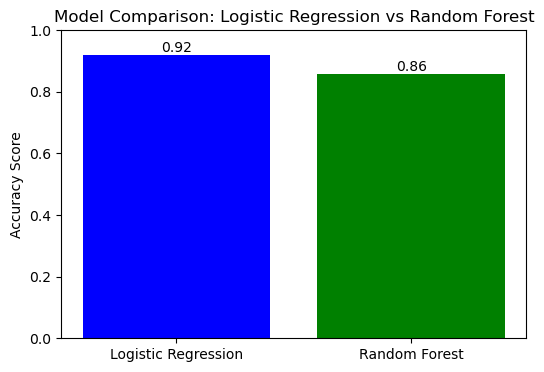

In [22]:
import matplotlib.pyplot as plt
log_reg_acc = 0.92   # Logistic Regression accuracy
rf_acc = 0.858        # Random Forest accuracy

models = ["Logistic Regression", "Random Forest"]
accuracies = [log_reg_acc, rf_acc]
plt.figure(figsize=(6, 4))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.ylim(0, 1)
plt.ylabel("Accuracy Score")
plt.title("Model Comparison: Logistic Regression vs Random Forest")
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center', fontsize=10)
plt.show()


In [ ]:
A brief summary of these models:

Logistic Regression:

Accuracy ≈ 85%

ROC-AUC ≈ 0.82

High recall for non-churn, but poor at identifying churn customers.

Random Forest:

Accuracy ≈ 92%

ROC-AUC ≈ 0.92

Balanced performance, better at predicting churn.

Key features: Customer service calls, International plan, Day minutes, Day charge, Total eve minutes.